This analysis borrowed from Abhishek Sharma https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

In [13]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import pylab
import seaborn as sns

In [3]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n=100):
    points = []
    for i in range(1, n + 1):
        x = math.cos(2 * math.pi / n * i) * r + np.random.normal(-30,30)
        y = math.sin(2 * math.pi / n * i) * r + np.random.normal(-30,30)
        points.append((x, y))
    return points

In [6]:
# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500, 1000))
df = df.append(PointsInCircum(300, 700))
df = df.append(PointsInCircum(100, 300))

# Adding noise to the dataset
df = df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

In [7]:
df

,0,1
0,458.064639,11.052782
1,469.439358,-45.389134
2,448.336722,30.950115
3,476.528150,-30.456303
4,454.975252,-100.860183
...,...,...
295,-59.000000,427.000000
296,474.000000,-514.000000
297,-591.000000,-156.000000
298,177.000000,518.000000


Text(0, 0.5, 'Feature 2')

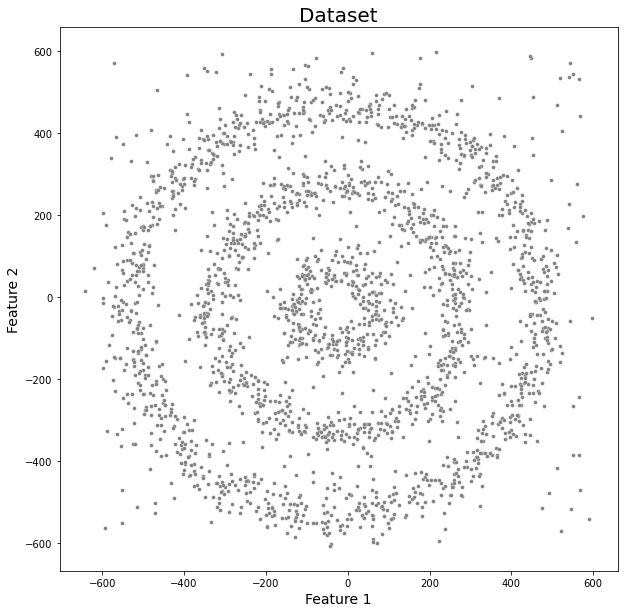

In [17]:
pylab.figure(figsize=(10, 10))
sns.scatterplot(x=df[0], y=df[1], s=15, color='grey')
pylab.title('Dataset', fontsize=20)
pylab.xlabel('Feature 1', fontsize=14)
pylab.ylabel('Feature 2', fontsize=14)

In [10]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4)
k_means.fit(df[[0, 1]])

KMeans(n_clusters=4)

Text(0, 0.5, 'Feature 2')

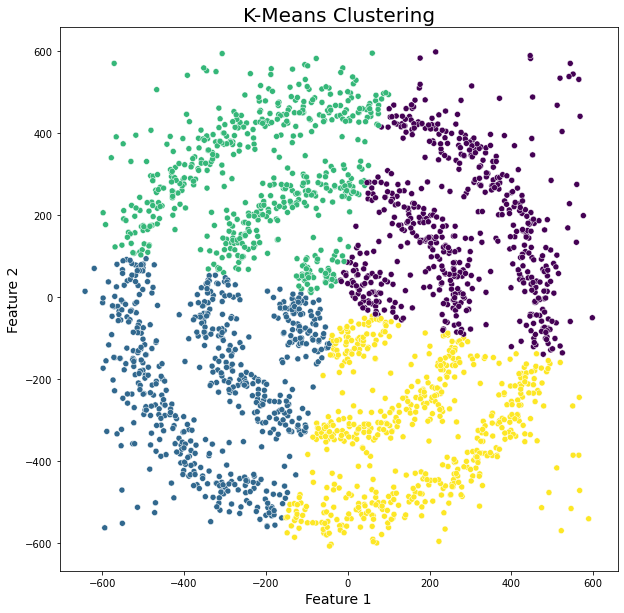

In [15]:
# Plotting resulting clusters
pylab.figure(figsize=(10, 10))
sns.scatterplot(x=df[0], y=df[1], c=k_means.labels_)
pylab.title('K-Means Clustering', fontsize=20)
pylab.xlabel('Feature 1', fontsize=14)
pylab.ylabel('Feature 2', fontsize=14)

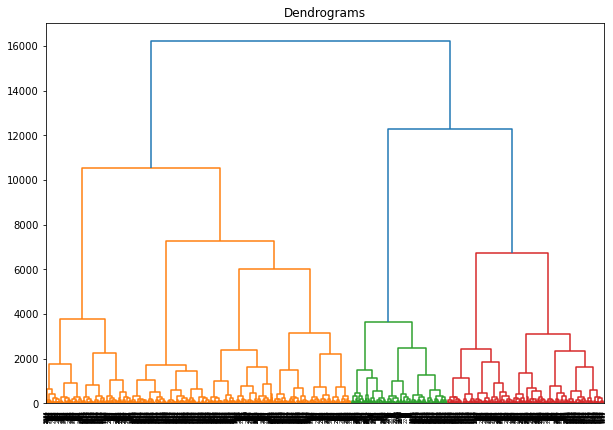

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [24]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df)

AgglomerativeClustering(n_clusters=4)

Text(0, 0.5, 'Feature 2')

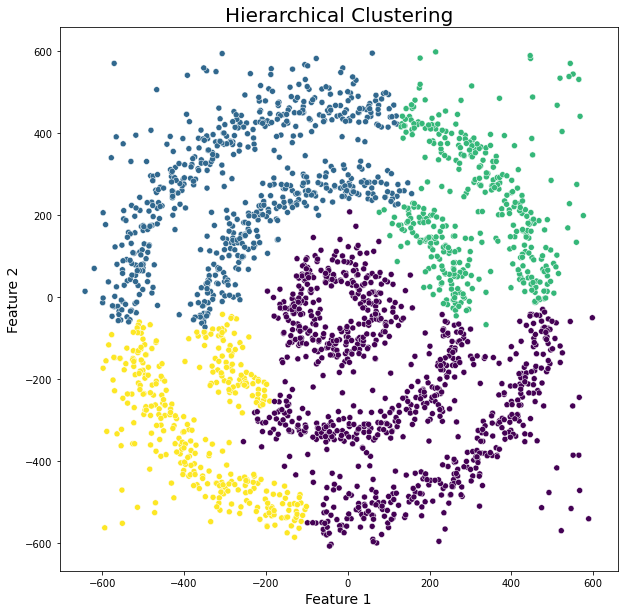

In [25]:
# Plotting resulting clusters
pylab.figure(figsize=(10,10))
sns.scatterplot(x=df[0], y=df[1], c=model.labels_)
pylab.title('Hierarchical Clustering', fontsize=20)
pylab.xlabel('Feature 1', fontsize=14)
pylab.ylabel('Feature 2', fontsize=14)

In [26]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN()

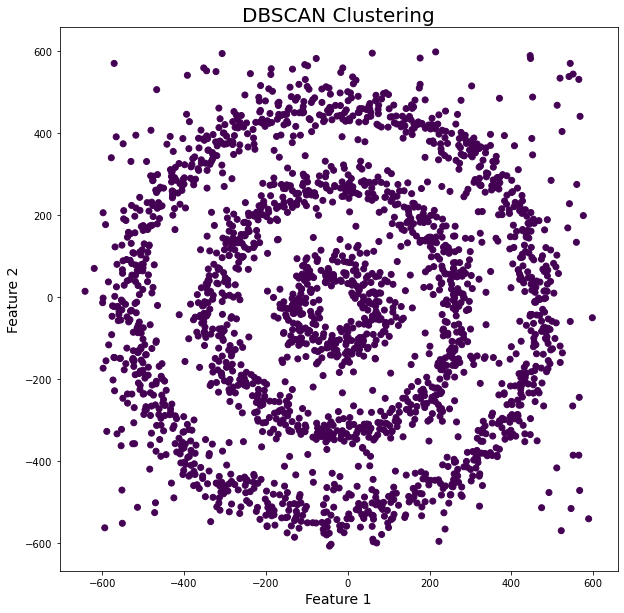

In [27]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0], df[1], c=dbscan.labels_)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [38]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

Text(0, 0.5, 'Epsilon')

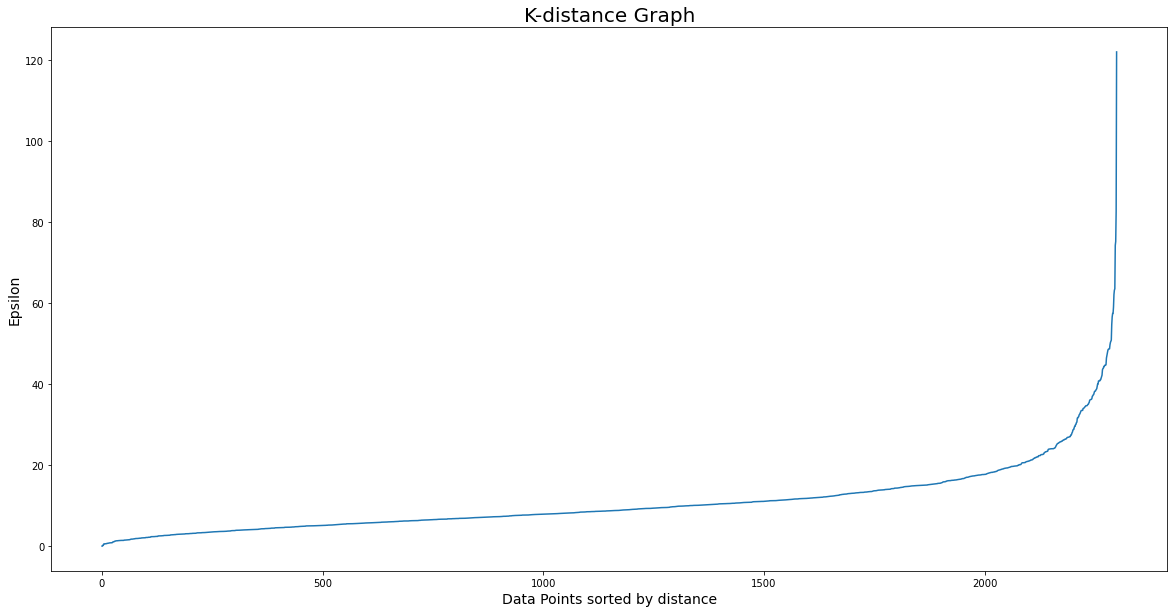

In [39]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
pylab.figure(figsize=(20,10))
pylab.plot(distances)
pylab.title('K-distance Graph', fontsize=20)
pylab.xlabel('Data Points sorted by distance', fontsize=14)
pylab.ylabel('Epsilon', fontsize=14)


In [41]:
dbscan_opt = DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df)

DBSCAN(eps=30, min_samples=6)

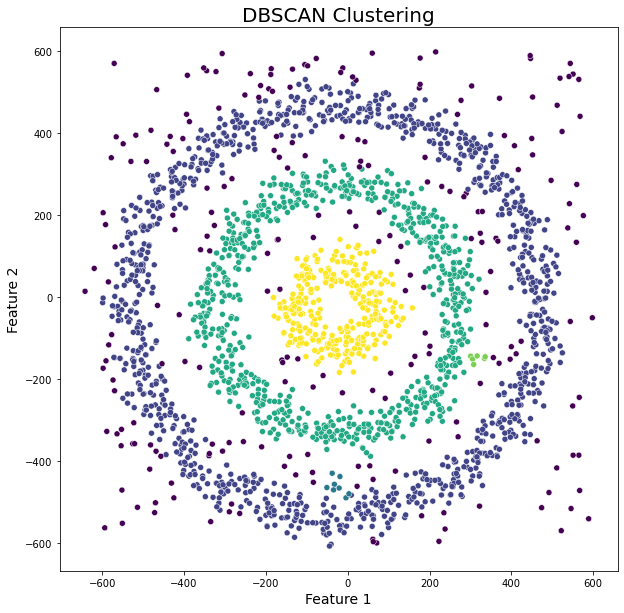

In [42]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df[0], y=df[1], c=dbscan_opt.labels_)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()